# <center>DATA.ML.200 Pattern Recognition and Machine Learning</center>

### <center>Md. Abdullah-Al Mamun</center>

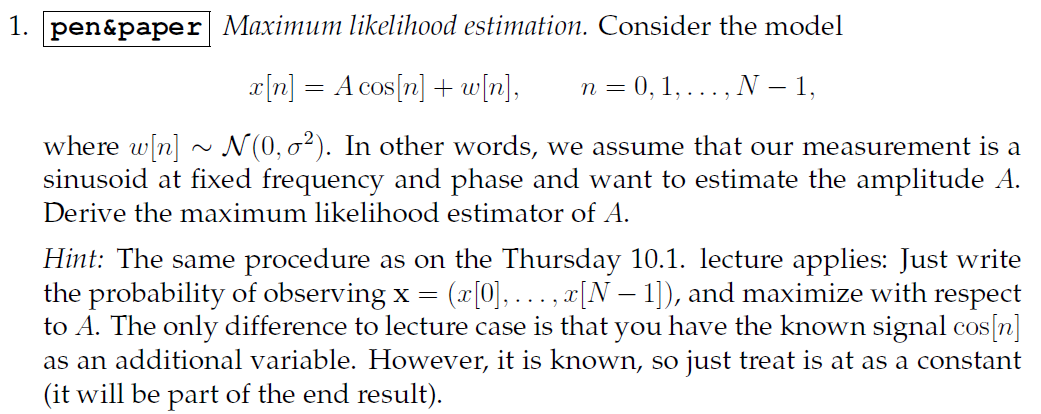

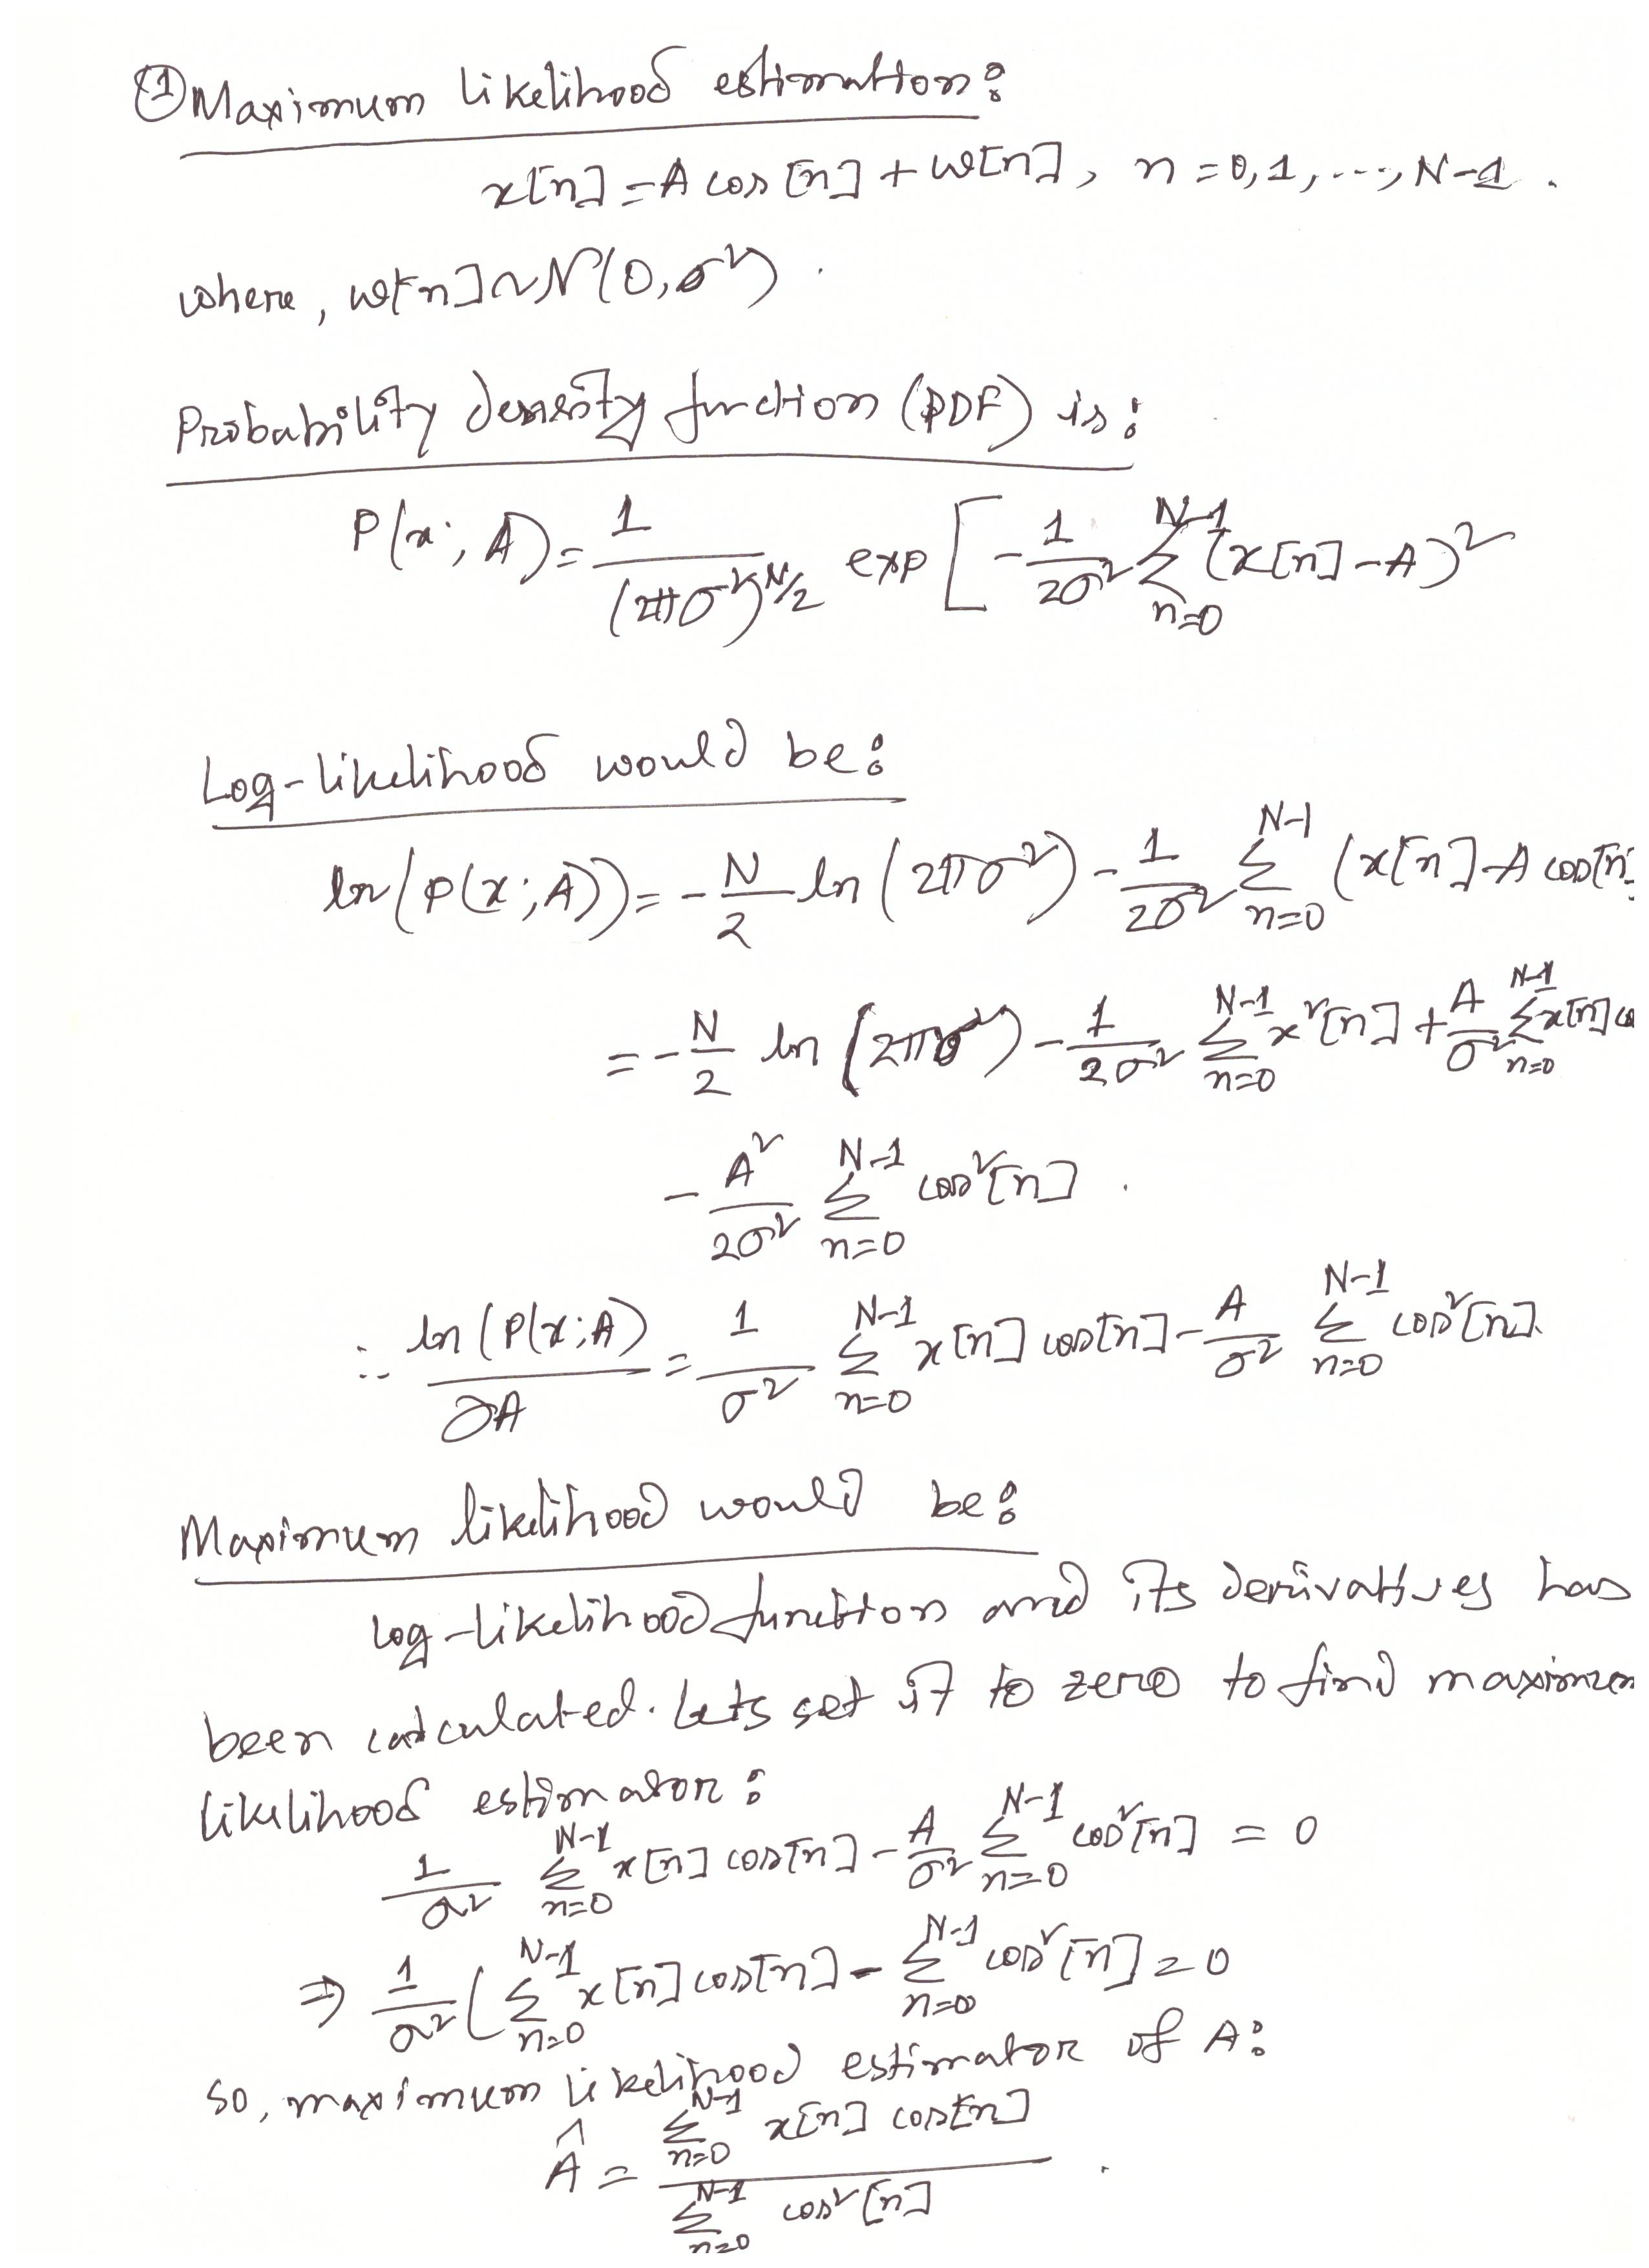

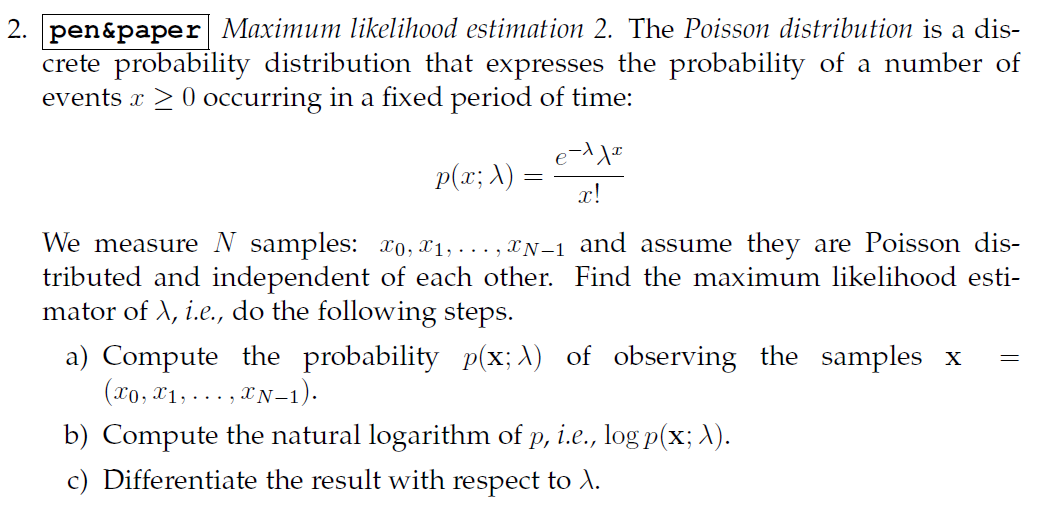


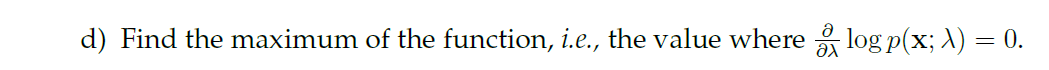

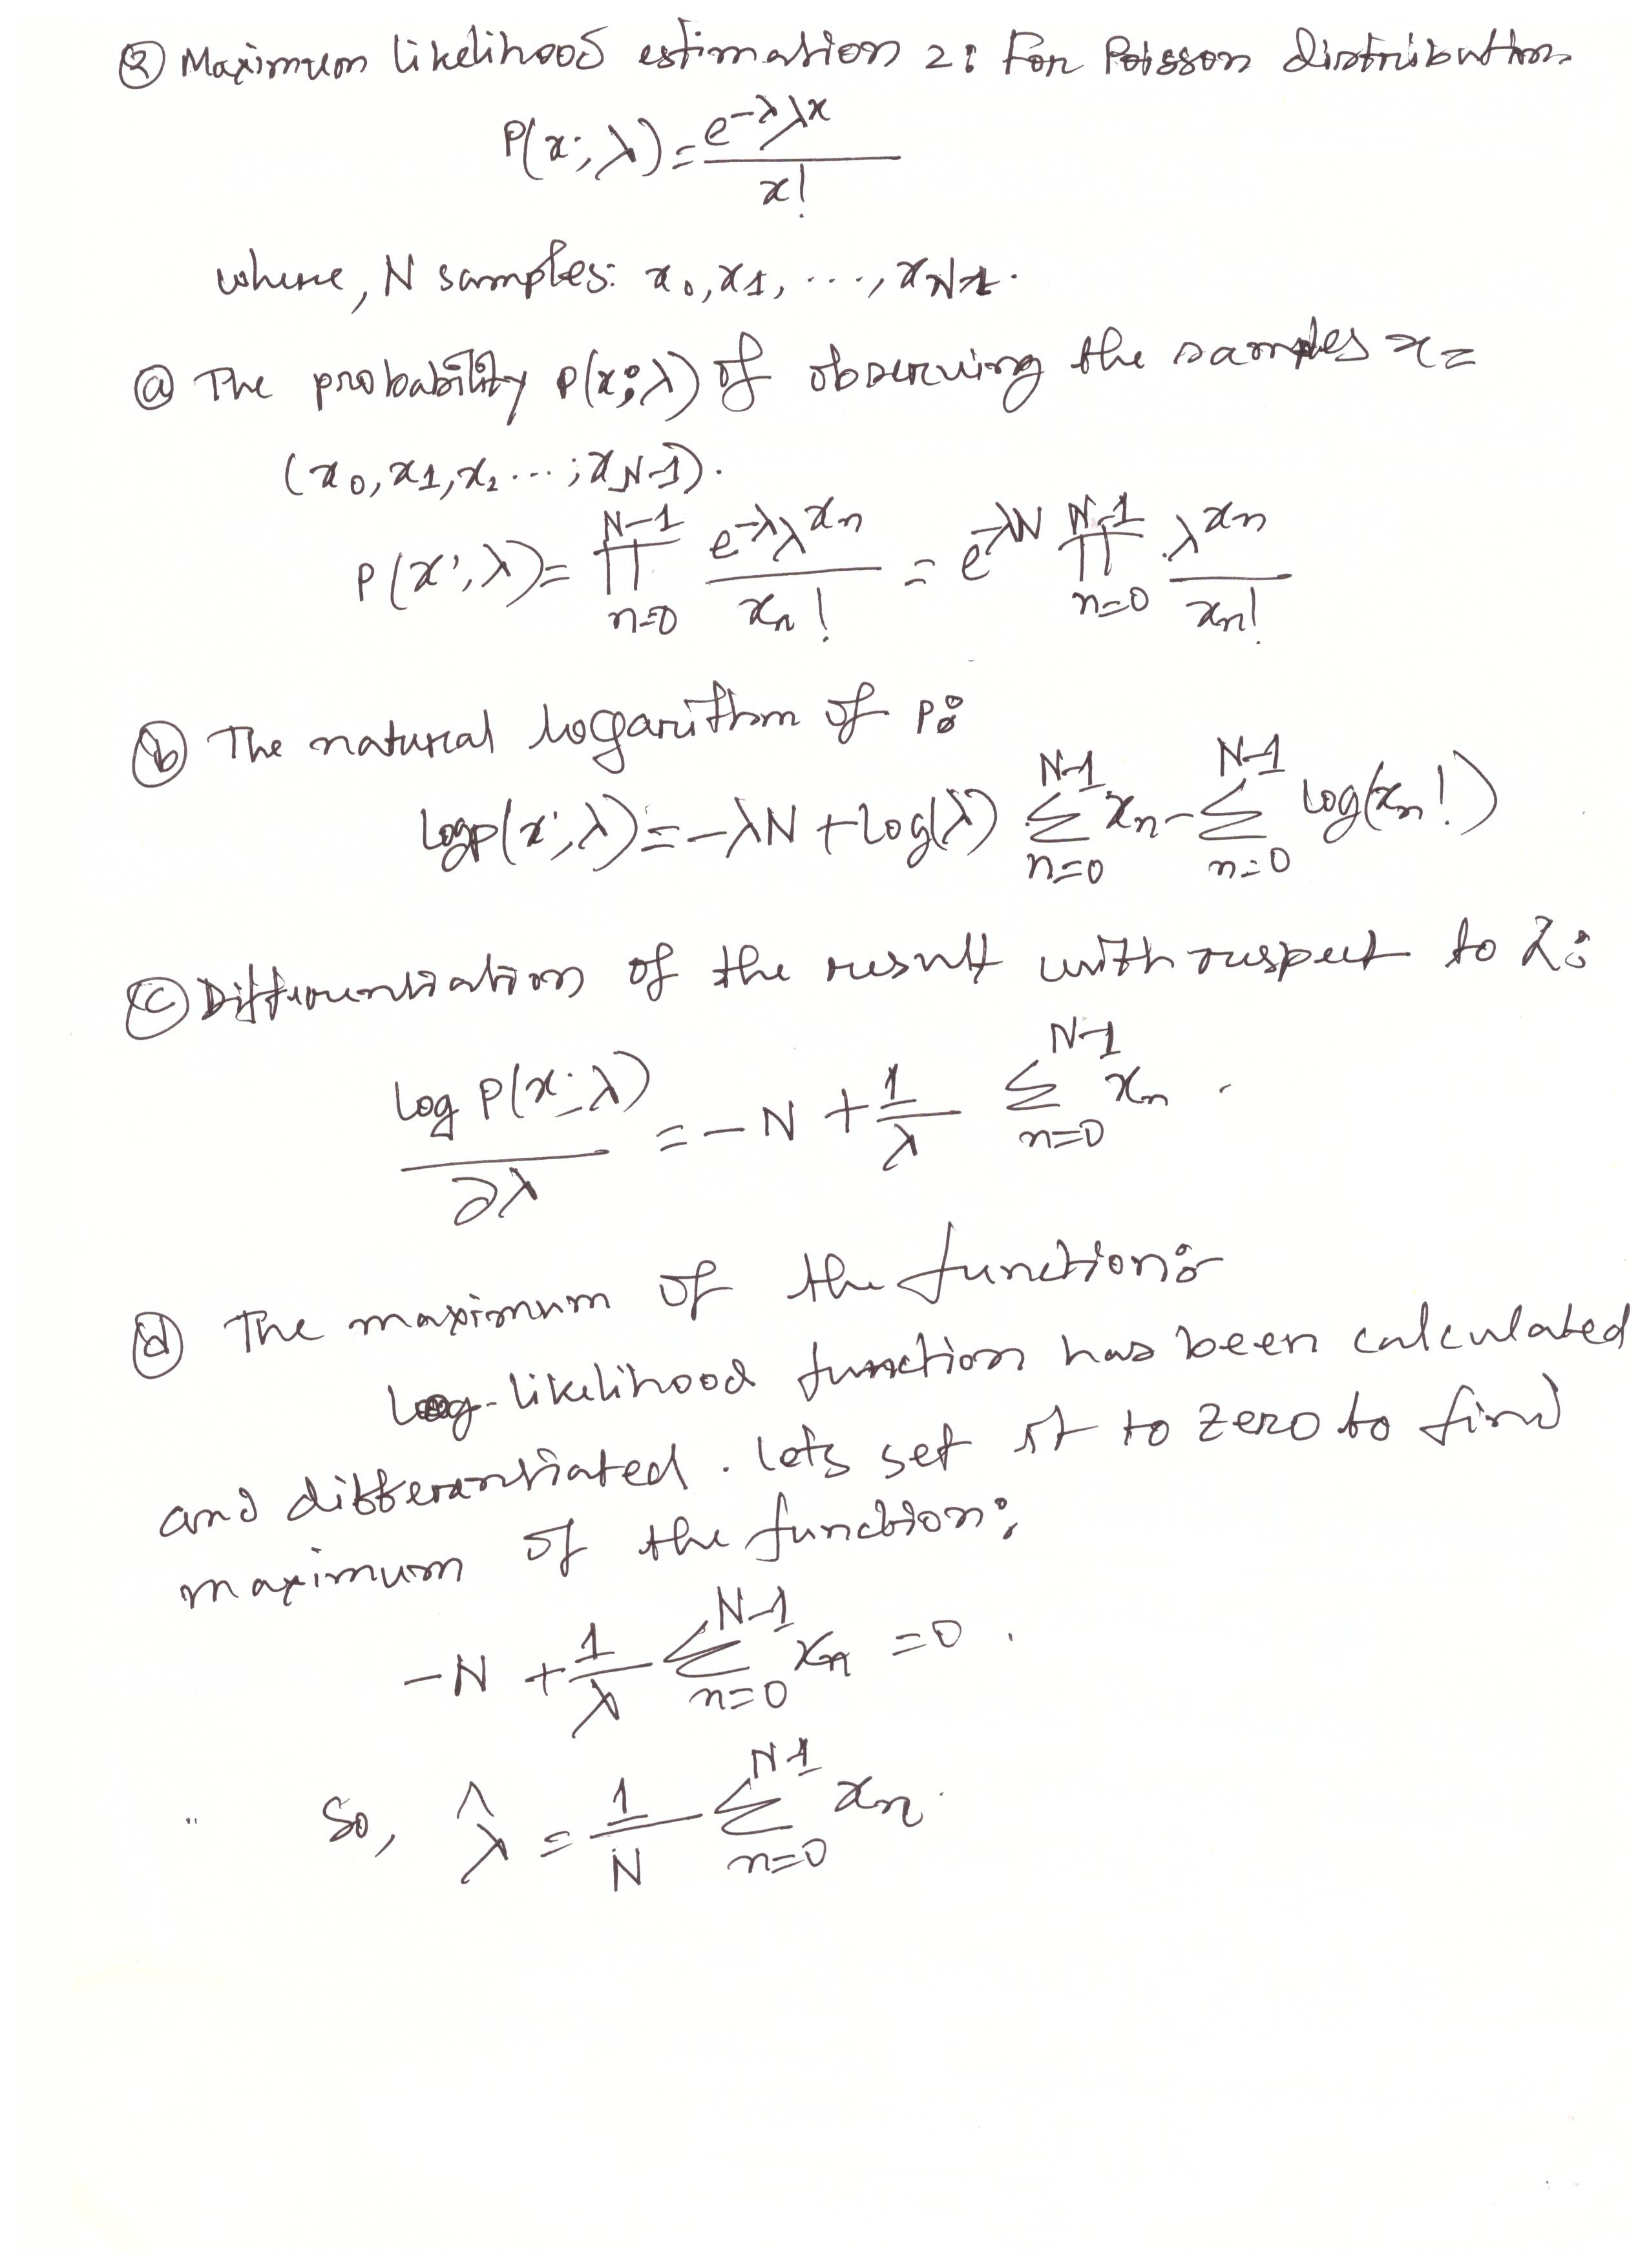

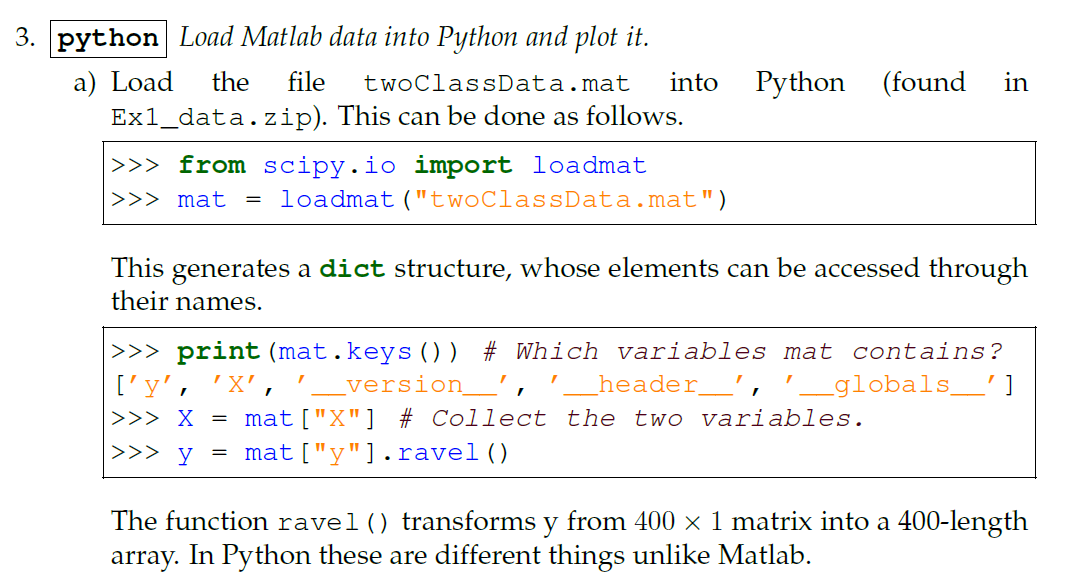

In [1]:
from scipy.io import loadmat
mat = loadmat("twoClassData.mat")

In [2]:
print(mat.keys()) # Which variables mat contains?

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [3]:
X = mat["X"] # Collect the two variables.

In [4]:
X.shape

(400, 2)

In [5]:
y = mat["y"].ravel()

In [6]:
y.shape

(400,)

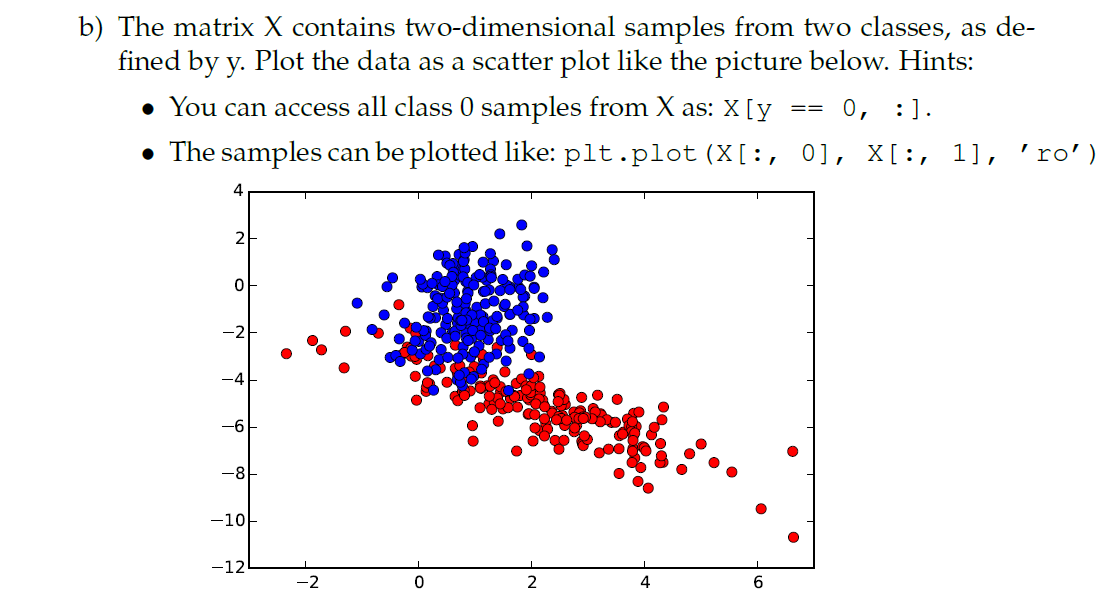

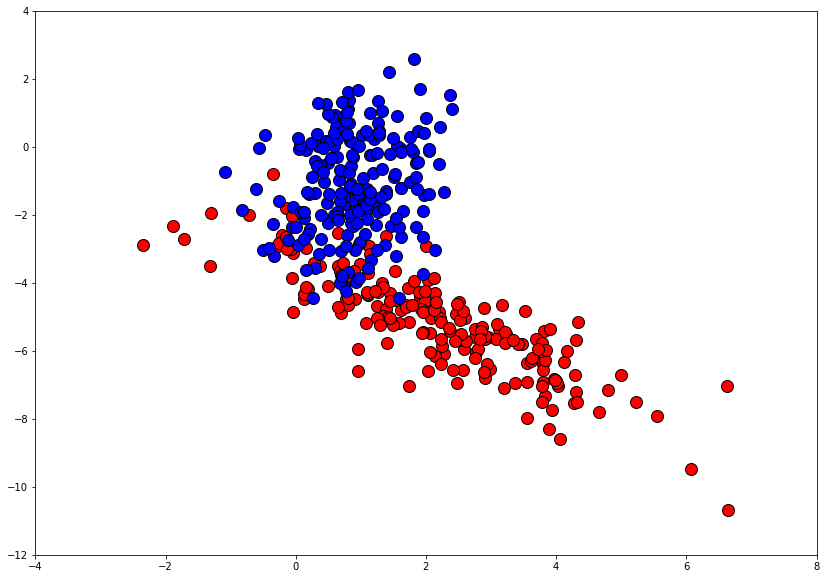

In [11]:
# simple plotting

import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.plot(X[y==0,0], X[y==0,1], 'ro', markersize=12, markeredgecolor='black')
plt.plot(X[y==1,0], X[y==1,1], 'bo', markersize=12, markeredgecolor='black')
plt.axis([-4, 8,-12, 4])

plt.show()

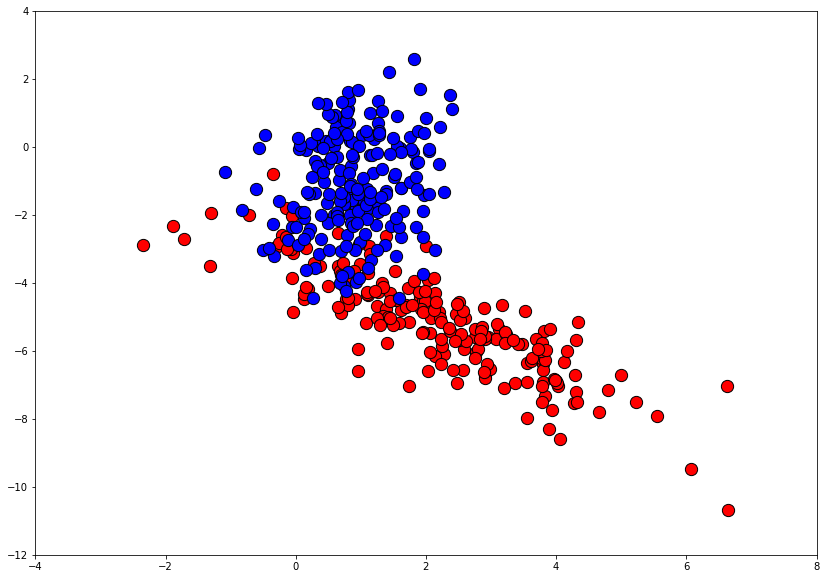

In [12]:
# scatter plot

import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.scatter(X[y==0,0], X[y==0,1], c='r', edgecolor='black', s=150)
plt.scatter(X[y==1,0], X[y==1,1], c='b', edgecolor='black', s=150)
plt.axis([-4, 8,-12, 4])
plt.show()

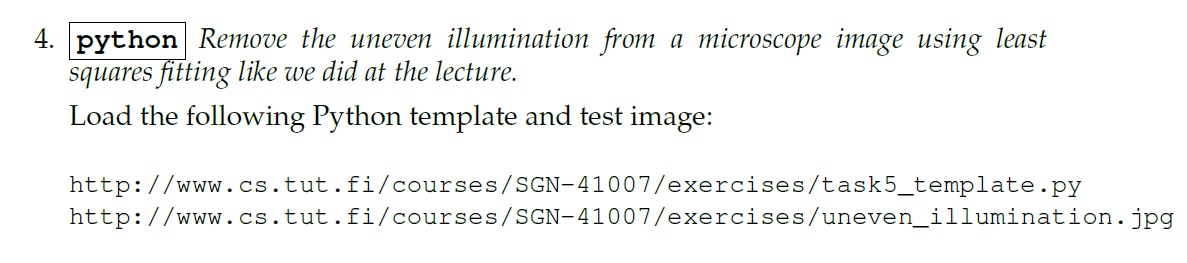

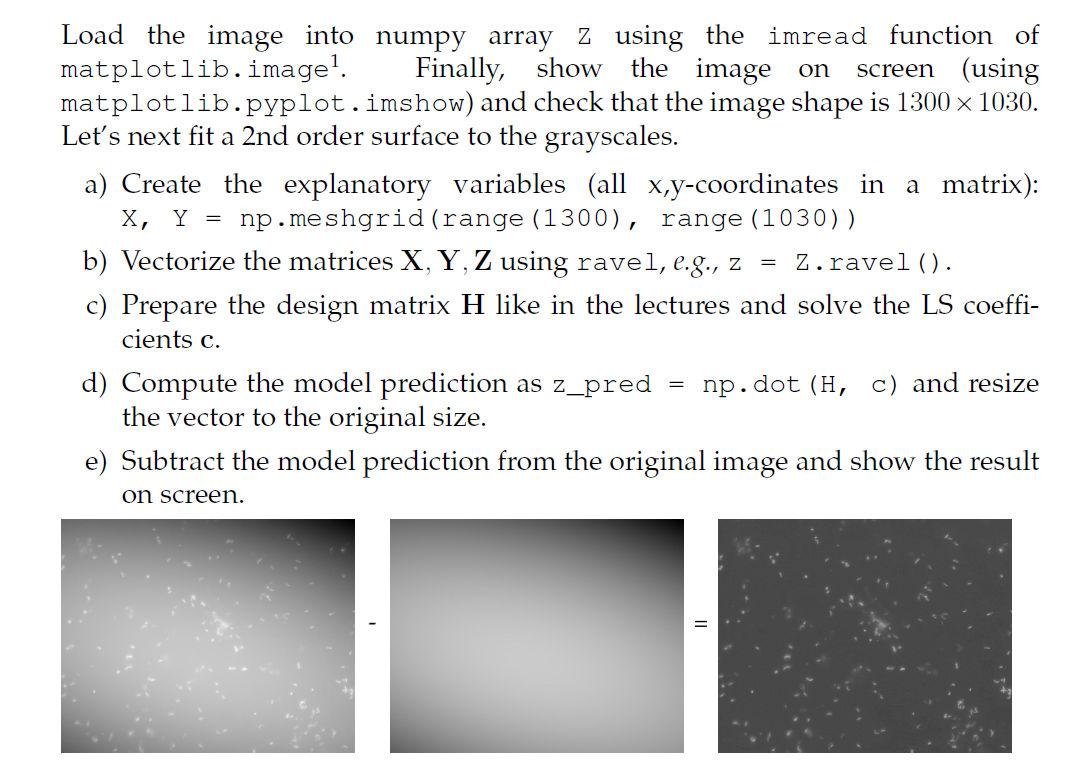

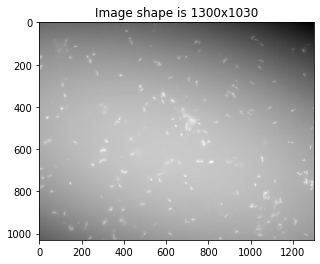

In [13]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

# Read the data

img = imread("uneven_illumination.jpg")
plt.imshow(img, cmap='gray')
plt.title("Image shape is %dx%d" % (img.shape[1], img.shape[0]))
plt.show()

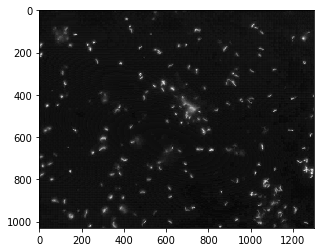

In [14]:
# Create the X-Y coordinate pairs in a matrix
X, Y = np.meshgrid(range(1300), range(1030))
Z = img

x = X.ravel()
y = Y.ravel()
z = Z.ravel()

# ********* TODO 1 **********
# Create data matrix
# Use function "np.column_stack".
# Function "np.ones_like" creates a vector like the input.


H=np.column_stack((x**2,y**2,x*y,x,y,np.ones_like(x)))

# ********* TODO 2 **********
# Solve coefficients
# Use np.linalg.lstsq
# Put coefficients to variable "theta" which we use below.


theta, residuals, _, _=np.linalg.lstsq(H,z,rcond=None)

# Predict
z_pred = H @ theta
Z_pred = np.reshape(z_pred, X.shape)

# Subtract & show
S = Z - Z_pred
plt.imshow(S, cmap = 'gray')
plt.show()

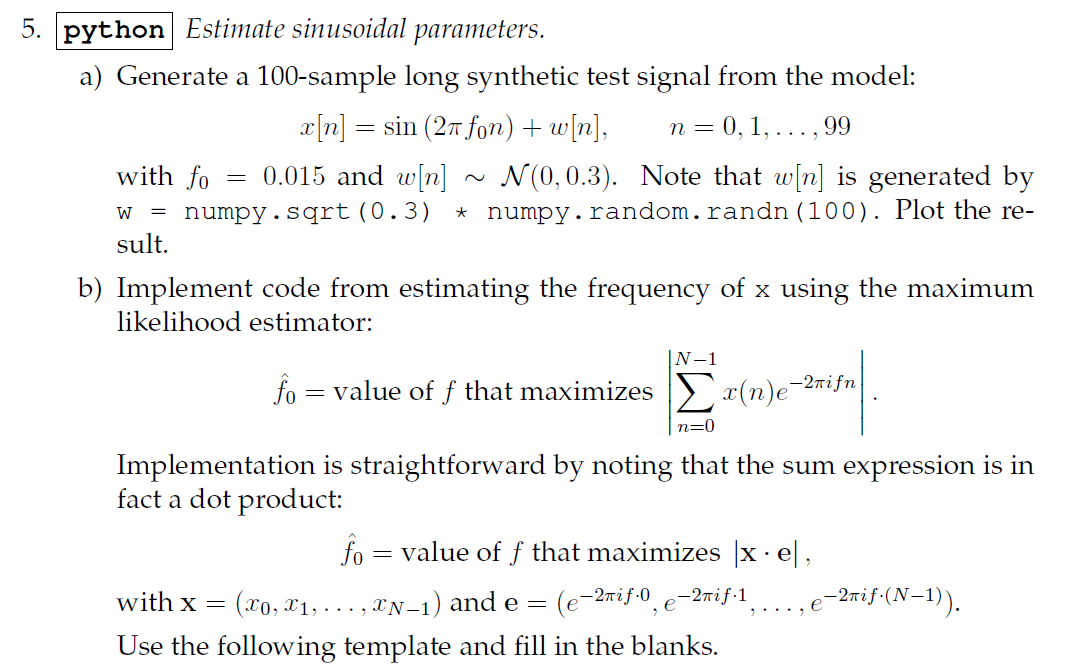

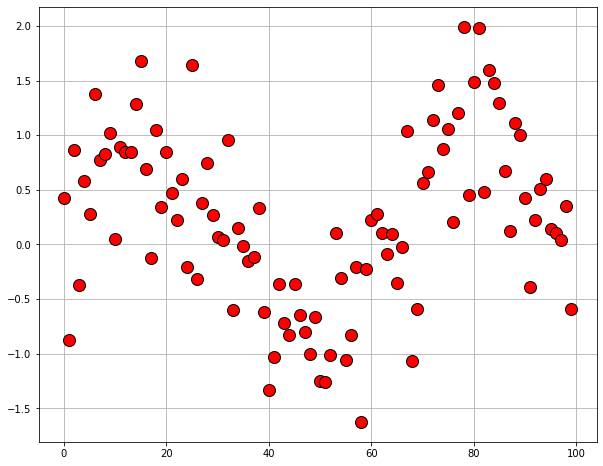

In [15]:
fcap = 0.015
n=np.arange(0,100)
wn = np.sqrt(0.3) * np.random.randn(100)
xn=np.sin(2*np.pi*fcap*n)+wn

plt.figure(figsize=(10,8))
plt.plot(xn,'ro',markeredgecolor='black',markersize=12)
plt.grid(True)
plt.show()

In [16]:
scores = []
frequencies = []
for f in np.linspace(0, 0.5, 1000):    
    z = -2*np.pi*1j*f*n      
    e = np.exp(z)
    score =np.abs(np.dot(xn,e)) 
    scores.append(score)
    frequencies.append(f)
    
fHat = frequencies[np.argmax(scores)]
print('f\u0302 : {:.3f}'.format(fHat))

f̂ : 0.015


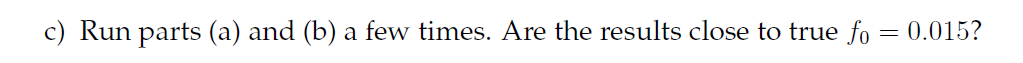

In [17]:
fcap = 0.015
n=np.arange(0,100)
estm=[]

for i in range(10000):
    wn = np.sqrt(0.3) * np.random.randn(100)
    xn=np.sin(2*np.pi*fcap*n)+wn
    
    scores = []
    frequencies = []
    for f in np.linspace(0, 0.5, 1000):
        z = -2*np.pi*1j*f*n 
        e = np.exp(z)
        score =np.abs(np.dot(xn,e)) 
        scores.append(score)
        frequencies.append(f)
    fHat = frequencies[np.argmax(scores)]
    estm.append(fHat)
    
average=sum(estm)/len(estm)
print("Average of the estimates: {:.3f}".format(average))

Average of the estimates: 0.014


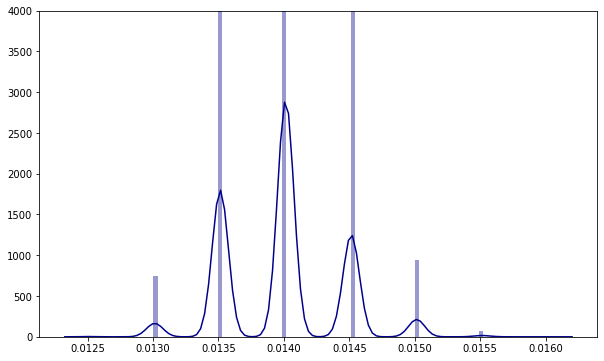

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(estm, ax=ax, bins=100,color = 'darkblue',)
ax.set_ylim(0,4000)
plt.show()